# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading the data

In [3]:
df = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/sampled_jd_skills.csv")
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,id,summary_len,skill_count
0,https://www.linkedin.com/jobs/view/software-ar...,2024-01-19 09:45:09.215838+00,t,t,f,Software Architect,Harris Computer,"Florida, United States",2024-01-13,Beverly Hills,United States,Director Technical,Mid senior,Onsite,"Product architecture, Engineering processes, C...",As Architect you will define the products’ hig...,340370,6407,33
1,https://www.linkedin.com/jobs/view/senior-syst...,2024-01-19 09:45:09.215838+00,t,t,f,Senior System Engineer,ExLabs,"Long Beach, CA",2024-01-13,Compton,United States,Maintenance Data Analyst,Mid senior,Onsite,"Systems engineering, Technical oversight, Requ...",Job Title: Sr. System Engineer\nCompany: ExLab...,640026,6308,32
2,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 11:15:59.804413+00,t,t,f,Senior Data Scientist,Workforce Connections,"St Louis, MO",2024-01-14,Belleville,United States,Chemist,Mid senior,Onsite,"Data Science, Data Analysis, Machine Learning,...","Location: Onsite, St. Louis MO 63146\nJob Resp...",1096469,3635,30
3,https://www.linkedin.com/jobs/view/distinguish...,2024-01-19 22:25:24.801979+00,t,t,f,Distinguished Applied Researcher,Jobs for Humanity,"Fort Worth, TX",2024-01-15,Fort Worth,United States,Director Research,Mid senior,Onsite,"AI, Applied Research, Machine Learning, Natura...",Company Description\nJobs for Humanity is part...,998553,4011,34
4,https://www.linkedin.com/jobs/view/systems-adm...,2024-01-21 01:06:09.90334+00,t,t,f,Systems Administrator,Leidos,"Colorado Springs, CO",2024-01-14,Cripple Creek,United States,Tier,Mid senior,Onsite,"System Administration, IT Operating Systems, C...",Description\nThe Leidos Digital Modernization ...,1189859,4117,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,https://uk.linkedin.com/jobs/view/workshop-con...,2024-01-19 09:45:09.215838+00,t,t,f,Workshop Controller,Activate Group Limited,"Bury St. Edmunds, England, United Kingdom",2024-01-13,Ipswich,United Kingdom,Controller,Mid senior,Onsite,"Workshop Control, Body Shop Management, HighQu...",Job title: Workshop Controller\nDepartment: Ac...,321651,4703,32
1496,https://www.linkedin.com/jobs/view/x-ray-techn...,2024-01-21 04:16:54.473867+00,t,t,f,X-Ray Technologist,Fast Pace Health,"Grant, AL",2024-01-17,Guntersville,United States,Ultrasound Technologist,Mid senior,Onsite,"XRay Technologist, HIPAA, Patient intake, Nurs...",Posting Title: X-Ray Technologist Overview:\nF...,1230454,5704,38
1497,https://www.linkedin.com/jobs/view/xfinity-ret...,2024-01-19 23:17:04.320124+00,t,t,f,Xfinity Retail Sales Consultant,XFINITY Store by Comcast,"East Brunswick, NJ",2024-01-14,Long Branch,United States,Sales-Service Promoter,Mid senior,Onsite,"Customer service, Product demonstration, Probl...",Job Summary\nResponsible for assisting and con...,159258,4839,32
1498,https://www.linkedin.com/jobs/view/yard-associ...,2024-01-19 09:45:09.215838+00,t,t,f,Yard Associate (SkillBridge),ARMOR Initiative,"Kansas City, MO",2024-01-13,Leavenworth,United States,Orderly,Associate,Onsite,"DoD SkillBridge Internship, Fulltime training,...",The ARMOR Initiative DoD SkillBridge Internshi...,774643,2277,30


In [4]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 1500
Number of columns in the dataset: 19


### Overview of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             1500 non-null   object
 1   last_processed_time  1500 non-null   object
 2   got_summary          1500 non-null   object
 3   got_ner              1500 non-null   object
 4   is_being_worked      1500 non-null   object
 5   job_title            1500 non-null   object
 6   company              1500 non-null   object
 7   job_location         1500 non-null   object
 8   first_seen           1500 non-null   object
 9   search_city          1500 non-null   object
 10  search_country       1500 non-null   object
 11  search_position      1500 non-null   object
 12  job_level            1500 non-null   object
 13  job_type             1500 non-null   object
 14  job_skills           1500 non-null   object
 15  job_summary          1500 non-null   object
 16  id    

### Null value report

In [6]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [7]:
null_value_report(df)

,column,Count,Percentage
0,job_link,0,0.0
1,last_processed_time,0,0.0
2,got_summary,0,0.0
3,got_ner,0,0.0
4,is_being_worked,0,0.0
5,job_title,0,0.0
6,company,0,0.0
7,job_location,0,0.0
8,first_seen,0,0.0
9,search_city,0,0.0


## Categorizing columns

In [8]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [9]:
get_cardinality(df)

,column,Count,Unique Percentage
0,job_link,1500,100.000000
1,last_processed_time,756,50.400000
2,got_summary,1,0.066667
3,got_ner,1,0.066667
4,is_being_worked,1,0.066667
5,job_title,1008,67.200000
6,company,1088,72.533333
7,job_location,854,56.933333
8,first_seen,6,0.400000
9,search_city,521,34.733333


In [10]:
ignore_columns = ["job_link", "last_processed_time", "got_summary", "got_ner", "is_being_worked", "id", "first_seen"]
numerical_columns = ["summary_len", "skill_count"]

categorical_columns = ["job_title", "company", "job_location", "search_city", "search_country", "search_position", "job_level", "job_type"]
text_columns = ["job_skills", "job_summary"]

In [11]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [12]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 2
Number of Categorical columns: 8
Number of Text columns: 2


## EDA

### Numerical columns

#### Null value report

In [13]:
null_value_report(df[numerical_columns])

,column,Count,Percentage
0,summary_len,0,0.0
1,skill_count,0,0.0


#### Statistics

In [14]:
df[numerical_columns].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,summary_len,skill_count
count,1500.00,1500.00
mean,4984.44,40.16
std,1404.21,13.17
min,2006.00,30.00
5%,2469.60,30.00
25%,3819.75,32.00
50%,5273.00,36.00
75%,6198.00,44.00
95%,6850.45,63.00
max,6998.00,161.00


#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [16]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,job_title,0,0.0
1,company,0,0.0
2,job_location,0,0.0
3,search_city,0,0.0
4,search_country,0,0.0
5,search_position,0,0.0
6,job_level,0,0.0
7,job_type,0,0.0


#### Statistics

In [17]:
df[categorical_columns].describe(include=['object'])

,job_title,company,job_location,search_city,search_country,search_position,job_level,job_type
count,1500,1500,1500,1500,1500,1500,1500,1500
unique,1008,1088,854,521,4,454,2,3
top,Senior Embedded Software Engineer,Recruiting from Scratch,"New York, NY",Alexandria,United States,Agricultural-Research Engineer,Mid senior,Onsite
freq,42,82,17,25,1336,100,1339,1493


#### Count plots

In [18]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


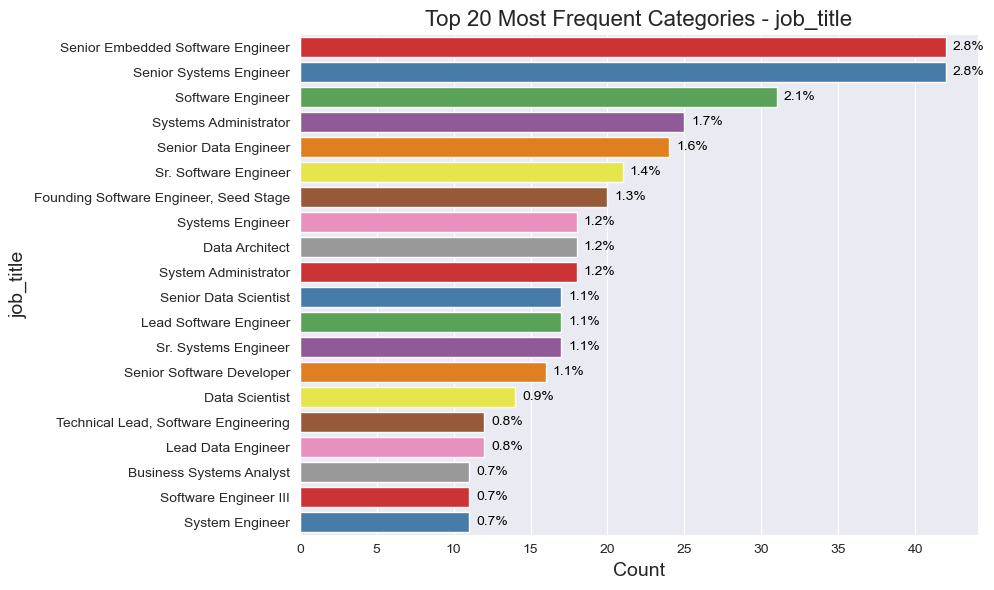

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


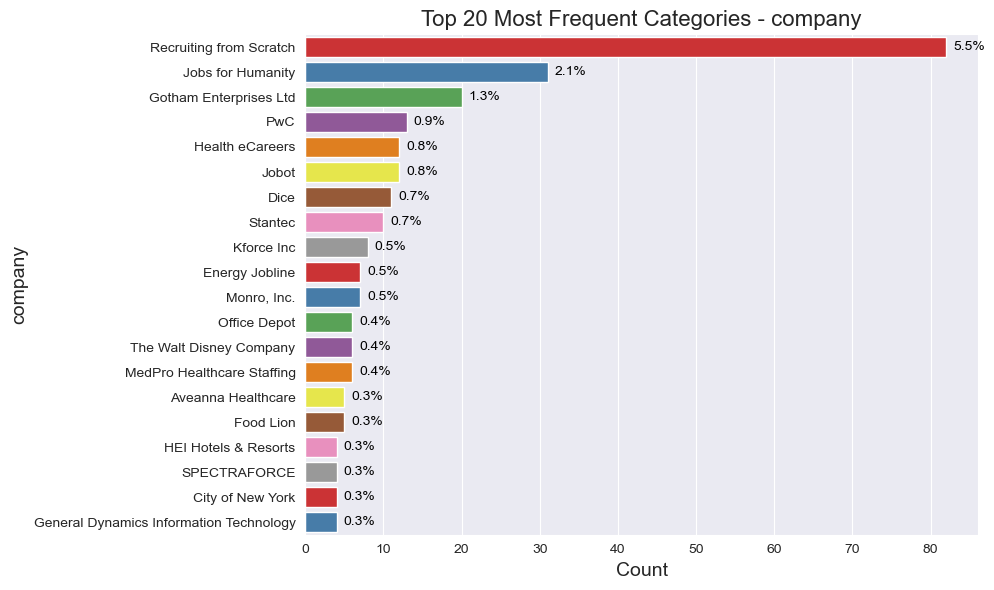

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


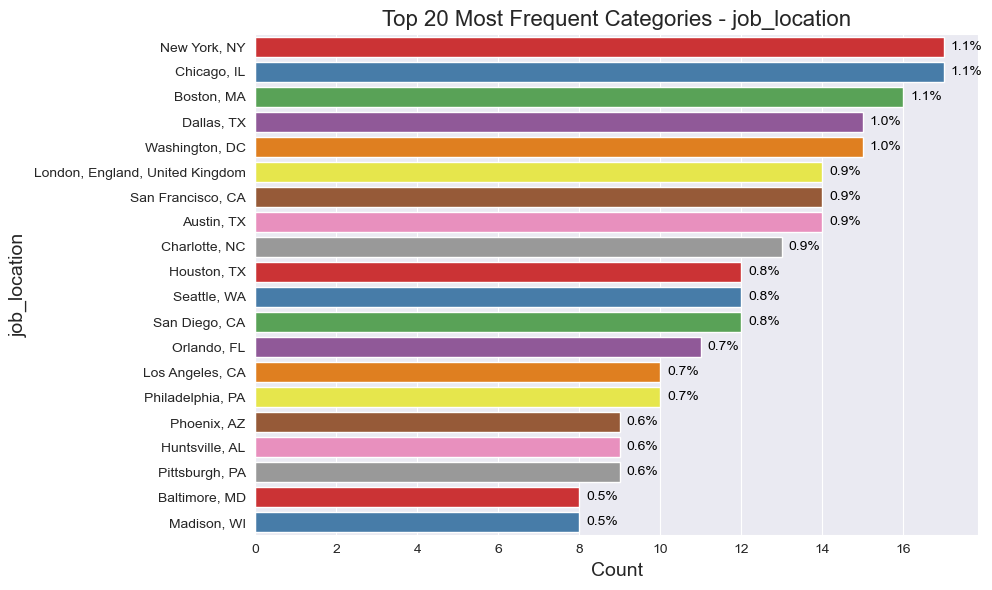

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


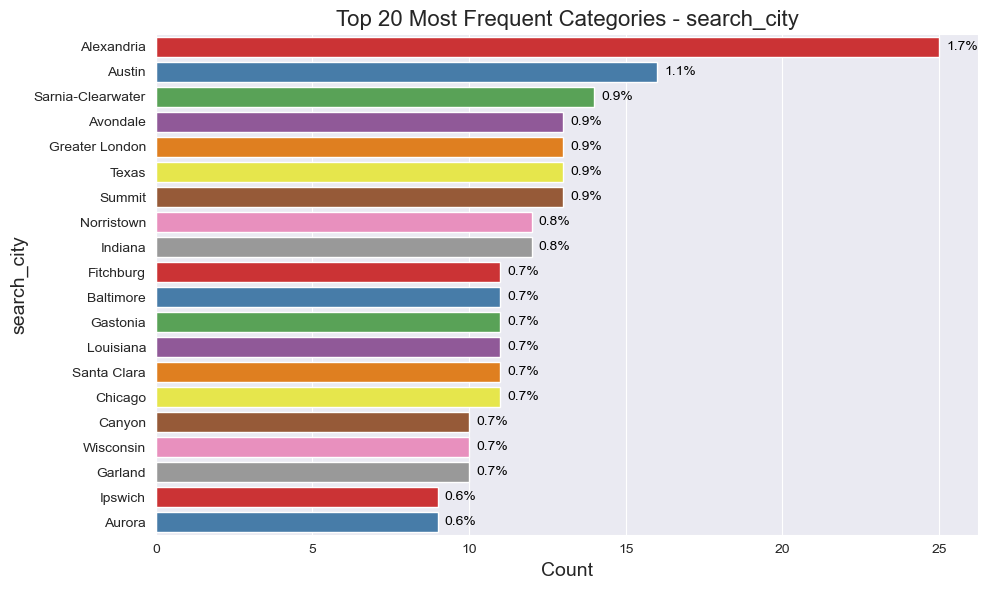

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


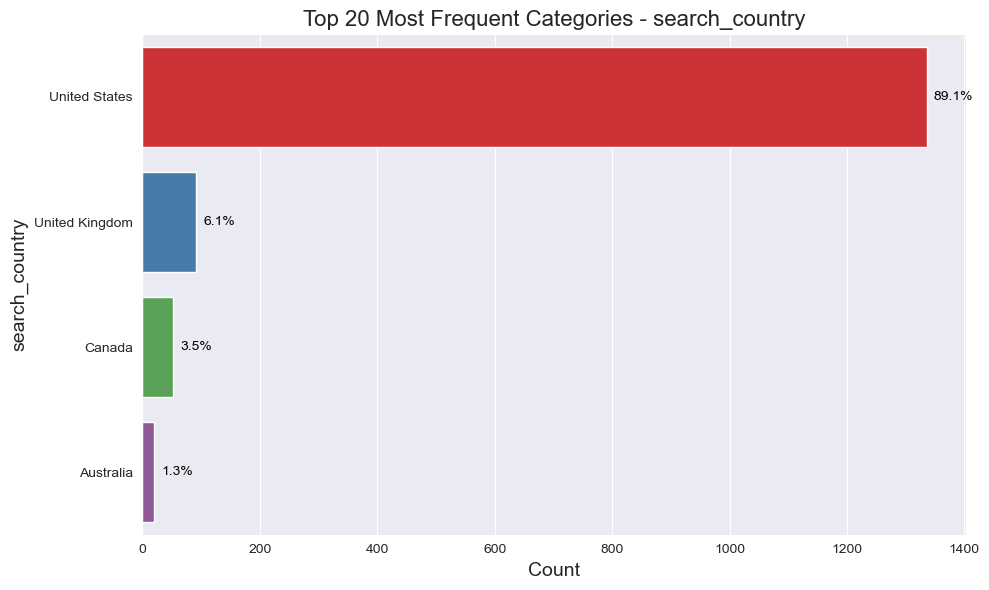

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


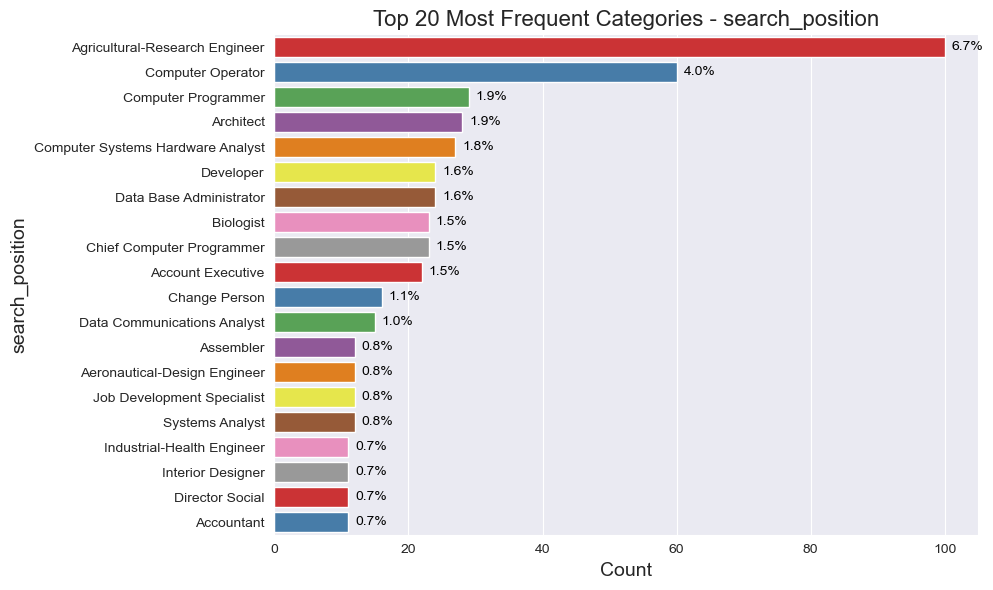

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


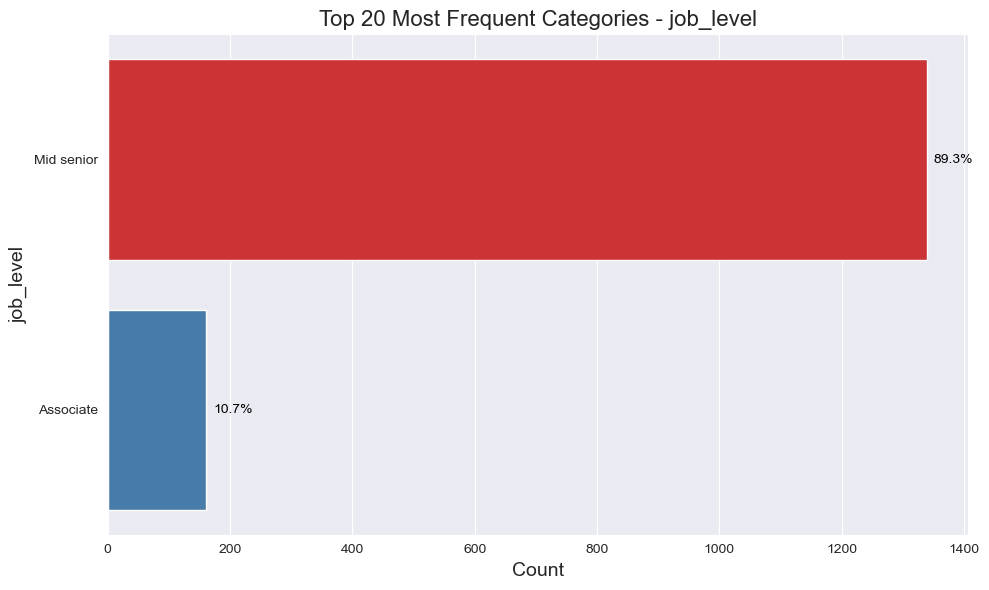

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_55548/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


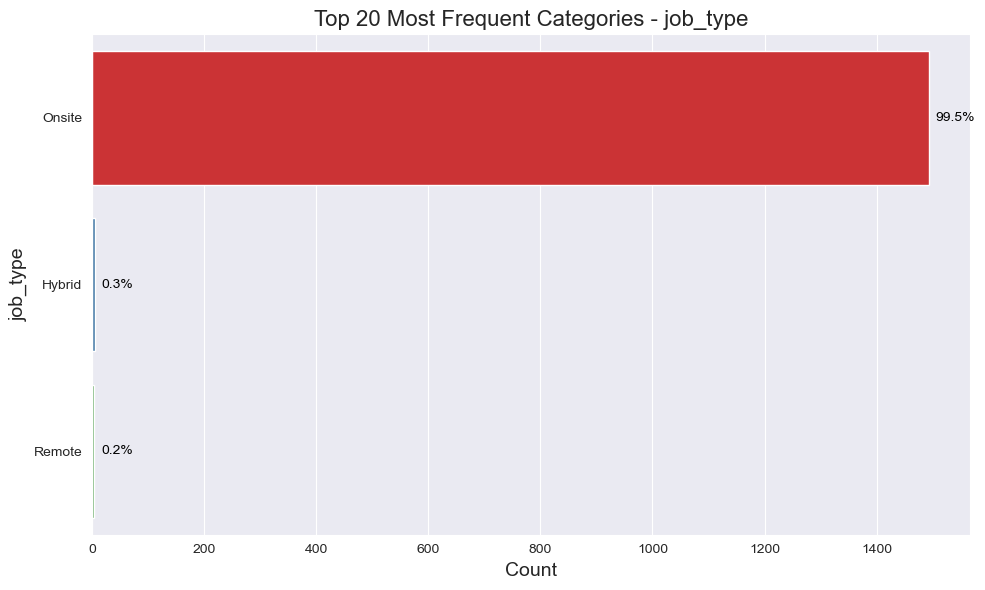

In [19]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [20]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0
